In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('kidney_disease.csv', sep=',')
df.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [3]:
df['bacteria'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [4]:
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [5]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)
df['specific gravity'].fillna(df['specific gravity'].mean(),inplace=True)
df['albumin'].fillna(df['albumin'].mean(),inplace=True)
df['sugar'].fillna(df['sugar'].mean(),inplace=True)
df['blood glucose random'].fillna(df['blood glucose random'].mean(),inplace=True)
df['blood urea'].fillna(df['blood urea'].mean(),inplace=True)
df['serum creatinine'].fillna(df['serum creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].mean(),inplace=True)
df.drop('red blood cells', inplace=True, axis=1)
df.drop('pus cell', inplace=True, axis=1)
df.drop('pus cell clumps', inplace=True, axis=1)
df.drop('packed cell volume', inplace=True, axis=1)
df.drop('white blood cell count', inplace=True, axis=1)
df.drop('red blood cell count', inplace=True, axis=1)
df.dropna(axis=0, how='any',inplace=True)
df.isnull().sum()


id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [6]:
df["bacteria"]=df["bacteria"].map({"present": 1, "notpresent": 0})
df["class"]=df["class"].map({"ckd": 1, "notckd": 0,'ckd\t' : 2})
df["anemia"]=df["anemia"].map({"yes": 1, "no": 0})
df["diabetes mellitus"]=df["diabetes mellitus"].map({"yes": 1, "no": 0,' yes' : 1,"\tno":2,"\tyes":3})
df["coronary artery disease"]=df["coronary artery disease"].map({"yes": 1, "no": 0,'\tno' : 2})
df["hypertension"]=df["hypertension"].map({"yes": 1, "no": 0})
df["pedal edema"]=df["pedal edema"].map({"yes": 1, "no": 0})
df["appetite"]=df["appetite"].map({"good": 1, "poor": 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       393 non-null    int64  
 1   age                      393 non-null    float64
 2   blood_pressure           393 non-null    float64
 3   specific gravity         393 non-null    float64
 4   albumin                  393 non-null    float64
 5   sugar                    393 non-null    float64
 6   bacteria                 393 non-null    int64  
 7   blood glucose random     393 non-null    float64
 8   blood urea               393 non-null    float64
 9   serum creatinine         393 non-null    float64
 10  sodium                   393 non-null    float64
 11  potassium                393 non-null    float64
 12  hemoglobin               393 non-null    float64
 13  hypertension             393 non-null    int64  
 14  diabetes mellitus        3

In [7]:
df.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,0,0,0,1,0,0,1


In [8]:
x = df[['age', 'blood_pressure','specific gravity','albumin','sugar','bacteria','blood glucose random','blood urea','serum creatinine','sodium','potassium','hemoglobin','hypertension','diabetes mellitus','coronary artery disease','appetite','pedal edema','anemia']]
y = df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.98


C:\Users\boti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

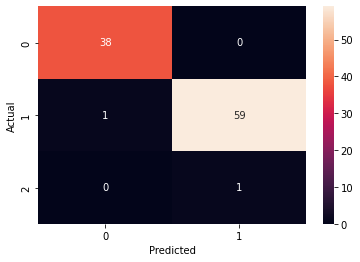

In [9]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [10]:
knn=KNeighborsClassifier(n_neighbors=20) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8686868686868687


In [11]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.86
Accuracy for k= 2 is: 0.88
Accuracy for k= 3 is: 0.86
Accuracy for k= 4 is: 0.87
Accuracy for k= 5 is: 0.86
Accuracy for k= 6 is: 0.87
Accuracy for k= 7 is: 0.86
Accuracy for k= 8 is: 0.87
Accuracy for k= 9 is: 0.86
Accuracy for k= 10 is: 0.87
Accuracy for k= 11 is: 0.86
Accuracy for k= 12 is: 0.87
Accuracy for k= 13 is: 0.85
Accuracy for k= 14 is: 0.88
Accuracy for k= 15 is: 0.9
Accuracy for k= 16 is: 0.9
Accuracy for k= 17 is: 0.89
Accuracy for k= 18 is: 0.88
Accuracy for k= 19 is: 0.86
Accuracy for k= 20 is: 0.87
Accuracy for k= 21 is: 0.85
Accuracy for k= 22 is: 0.83
Accuracy for k= 23 is: 0.86
Accuracy for k= 24 is: 0.85
Accuracy for k= 25 is: 0.83
Accuracy for k= 26 is: 0.83
Accuracy for k= 27 is: 0.82
Accuracy for k= 28 is: 0.82
Accuracy for k= 29 is: 0.82


In [12]:
# k = 15 is the best choise 
knn=KNeighborsClassifier(n_neighbors=15) 
knn.fit(x_train,y_train) 
y_pred=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.898989898989899


In [13]:
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test) 
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.9696969696969697


In [14]:
clf=RandomForestClassifier(n_estimators=10)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.9797979797979798


In [15]:
#the best Accuracy is by Randon forest classifier

In [16]:
df.drop('class', inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       393 non-null    int64  
 1   age                      393 non-null    float64
 2   blood_pressure           393 non-null    float64
 3   specific gravity         393 non-null    float64
 4   albumin                  393 non-null    float64
 5   sugar                    393 non-null    float64
 6   bacteria                 393 non-null    int64  
 7   blood glucose random     393 non-null    float64
 8   blood urea               393 non-null    float64
 9   serum creatinine         393 non-null    float64
 10  sodium                   393 non-null    float64
 11  potassium                393 non-null    float64
 12  hemoglobin               393 non-null    float64
 13  hypertension             393 non-null    int64  
 14  diabetes mellitus        3

In [17]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(x)

In [18]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,0
4,0
...,...
388,0
389,0
390,0
391,0


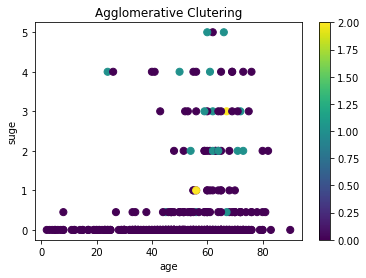

In [19]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['age'] , df ["sugar"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("age")
ax.set_ylabel("suge")
plt.colorbar(scatter)

In [24]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,2
1,2
2,0
3,2
4,2
...,...
388,1
389,1
390,1
391,1


In [36]:
label = kmeans.fit_predict(df)
print(kmeans.cluster_centers_) 
label

[[1.41522388e+02 5.87679124e+01 8.13871365e+01 1.01397742e+00
  1.79382747e+00 1.86494876e+00 8.95522388e-02 2.86656716e+02
  7.79630705e+01 4.20406648e+00 1.34574889e+02 5.08940873e+00
  1.09632527e+01 7.31343284e-01 8.95522388e-01 2.08955224e-01
  7.01492537e-01 2.53731343e-01 2.53731343e-01]
 [3.09017442e+02 4.73923452e+01 7.35054543e+01 1.02107023e+00
  2.16101695e-01 5.52408401e-02 1.16279070e-02 1.12600960e+02
  3.65654489e+01 1.24897990e+00 1.40913394e+02 4.37541928e+00
  1.44911053e+01 8.13953488e-02 5.81395349e-02 2.90697674e-02
  9.65116279e-01 5.23255814e-02 1.74418605e-02]
 [9.77532468e+01 5.29767330e+01 7.80862565e+01 1.01462731e+00
  1.61963460e+00 2.96129796e-01 9.09090909e-02 1.29384686e+02
  7.28734141e+01 4.72197874e+00 1.34901819e+02 4.70801906e+00
  1.09080534e+01 5.45454545e-01 5.00000000e-01 1.23376623e-01
  6.36363636e-01 3.24675325e-01 2.59740260e-01]]


array([2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

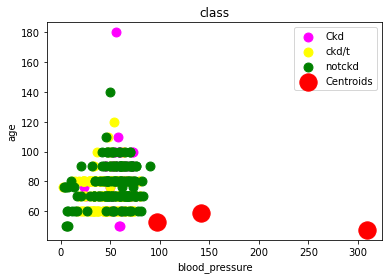

In [42]:
plt.scatter(df["age"][label== 0],          
            df["blood_pressure"][label == 0],s=80,c='magenta',label='Ckd')
plt.scatter(df["age"][label == 1],
           df["blood_pressure"][label == 1],s=80,c='yellow',label='ckd/t')
plt.scatter(df["age"][label == 2],
           df["blood_pressure"][label == 2],s=80,c='green',label='notckd')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('class')
plt.xlabel('blood_pressure')
plt.ylabel('age')
plt.legend()
plt.show()